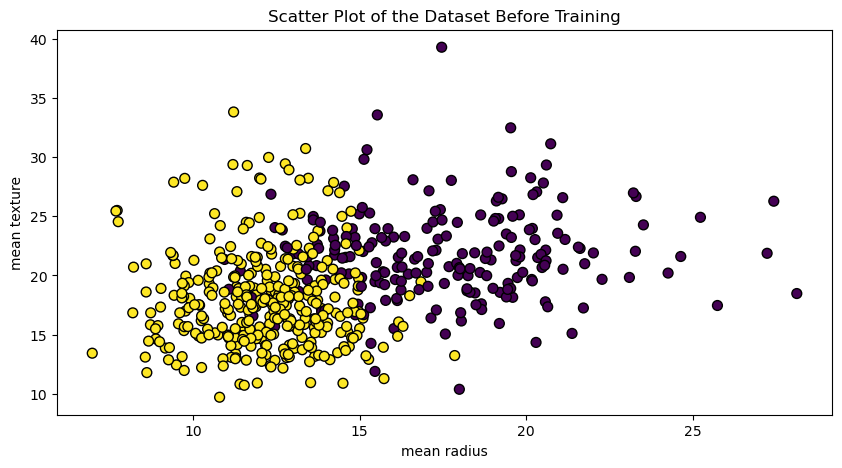

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame with feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Select two features for plotting
feature_x = 'mean radius'
feature_y = 'mean texture'

# Scatter plot for the whole dataset before training
plt.figure(figsize=(10, 5))
plt.scatter(df[feature_x], df[feature_y], c=df['target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Scatter Plot of the Dataset Before Training')
plt.show()




In [11]:
# Split the data into training and test sets
X = df[[feature_x, feature_y]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Create a mesh to plot the decision boundary
x_min, x_max = X_train[feature_x].min() - 1, X_train[feature_x].max() + 1
y_min, y_max = X_train[feature_y].min() - 1, X_train[feature_y].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot the decision boundary by assigning a color to each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


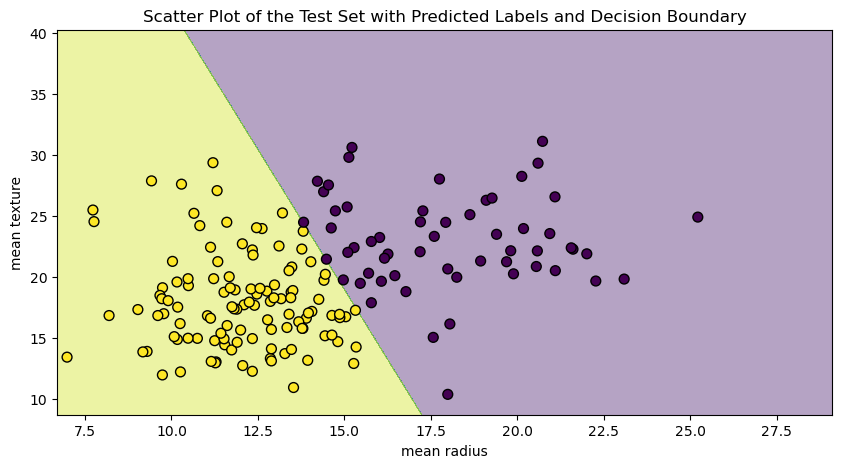

In [9]:
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_test[feature_x], X_test[feature_y], c=y_pred, edgecolor='k', s=50, cmap='viridis')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Scatter Plot of the Test Set with Predicted Labels and Decision Boundary')
plt.show()